# Shallow Convolution Model
This model has only 3 convolution layers with filters of size 7, 5, 3 and 3 max pooling layers.

In [ ]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import permutation, randint, rand
from numpy import rint
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

from numpy import expand_dims
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow import one_hot, reshape
from keras.layers import LeakyReLU, Softmax
from keras.layers import Conv2D, Activation, Input,Dropout,Lambda,Flatten, Dense
from keras.layers import Dense, Flatten, Reshape, Activation, MaxPool2D
from keras.layers import BatchNormalization
import cv2

# from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


There are 3 databases available with me.
* BhSig100Bengali
* BhSig160Hindi
* Cedar
* Sigcomp2011

We can select any of the three available.

In [ ]:
# database = input('Database Name: ')
# Models\model1_scnn\database\bhsig100bengali_128x64.h5
# database = database.lower() + '_128x64.h5'
# BASE_DIR = os.path.join(os.pardir, os.pardir)
metadata = {}
file = "/content/drive/MyDrive/cedar_128x643.h5"
print(file)
try:
    with File(file, 'r') as hdf:
        X = np.array(hdf.get('X'))
        Y = np.array(hdf.get('Y'))
        S = np.array(hdf.get('S'))
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(message)
X = X / 255.0
Y = Y * 1.0
# Y = one_hot(Y * 1.0, depth=2)
# Y = reshape(Y, (-1, 2))
print("Feature shape =", X.shape)
print("Label shape =", Y.shape)

/content/drive/MyDrive/cedar_128x643.h5
Feature shape = (2640, 64, 128, 3)
Label shape = (2640, 1)


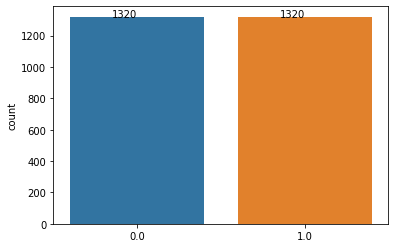

In [ ]:
ax = sns.countplot(x = Y.reshape(Y.shape[0]))
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

410
(64, 128, 3)


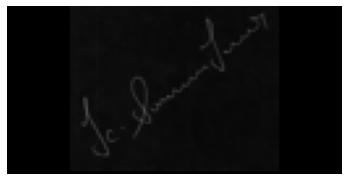

In [ ]:
x = np.random.randint(0,X.shape[0])
img = X[x]
print(x)
print(img.shape)
plt.imshow((img * 255).astype(np.uint8))
plt.axis("off")
plt.show()

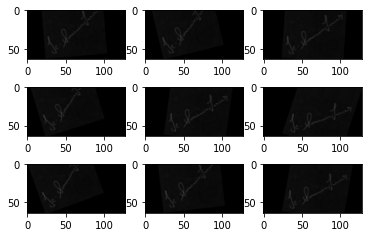

In [ ]:
# load the image
# img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img *255)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
  # pyplot.axis("off")
# show the figure
plt.show()

In [ ]:
import sklearn
class_weights = sklearn.utils.class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(Y),y = Y.reshape(Y.shape[0]))
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 1.0, 1: 1.0}

In [ ]:
seed=randint(10)
metadata['split_seed']=seed
print('seed =', seed)
indices = permutation(X.shape[0])
# print(X)
same = True
if same:
    m = int(0.70 * X.shape[0])
    n = int(0.15 * X.shape[0])
    training_id, validation_id, test_id = indices[:m], indices[m: m + n], indices[m+n:]
    X_train, X_test, X_validate = X[training_id], X[test_id], X[validation_id]
    Y_train, Y_test, Y_validate = Y[training_id], Y[test_id], Y[validation_id]
else:
    m = int(0.70 * X.shape[0])
    training_id, validation_id = indices[:m], indices[m:]
    X_train, X_validate = X[training_id], X[validation_id]
    Y_train, Y_validate = Y[training_id], Y[validation_id]
print("Shape of Features in training set =", X_train.shape)
print("Shape of Labels in training set =", Y_train.shape)
print("Shape of Features in testing set =", X_test.shape)
print("Shape of Labels in testing set =", Y_test.shape)

del Y,X

seed = 3
Shape of Features in training set = (1847, 64, 128, 3)
Shape of Labels in training set = (1847, 1)
Shape of Features in testing set = (397, 64, 128, 3)
Shape of Labels in testing set = (397, 1)


In [ ]:
#One hot Encoding
Y_train = one_hot(Y_train, depth=2)
Y_train = reshape(Y_train, (-1, 2))

Y_test = one_hot(Y_test, depth=2)
Y_test = reshape(Y_test, (-1, 2))

Y_validate = one_hot(Y_validate, depth=2)
Y_validate = reshape(Y_validate, (-1, 2))

In [ ]:
print("Shape of Labels in training set =", Y_train.shape)

Shape of Labels in training set = (1847, 2)


In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,train_size = 0.7, random_state = 42)

In [ ]:
# X_test, X_validate, Y_test, Y_validate = train_test_split(X_test, Y_test ,train_size = 0.5, random_state = 42)

In [ ]:
# del Y,X

In [ ]:
seed =randint(10)
metadata['init_seed']=seed
print('seed='+str(seed))
weights1 = np.random.rand(7,7,3,40)
bias1 = np.random.rand(40)
weights2 = np.random.rand(5,5,40,30)
bias2 = np.random.rand(30)
weights3 = np.random.rand(3,3,30,20)
bias3 = np.random.rand(20)

model = Sequential()
model.add(Input(shape = (64, 128, 3),name='input'))
conv1 = Conv2D(40, 7, strides = 1,activation='relu',name='conv1',use_bias = True)
model.add(conv1)
model.add(BatchNormalization(epsilon = 1e-08, axis = 1,name = 'batchnorm1', momentum = 0.9))
model.add(MaxPool2D(strides=2,name = "Pool1"))

conv2 = Conv2D(30, 5,strides = 1, activation='relu', name='conv2',use_bias = True)
model.add(conv2)
model.add(BatchNormalization(epsilon = 1e-08, axis = 1,name = 'batchnorm2', momentum = 0.9))
model.add(MaxPool2D(strides=3,name = "Pool2"))

conv3 = Conv2D(20, 3, strides = 1,activation='relu',name='conv3',use_bias = True)
model.add(conv3)
model.add(BatchNormalization(epsilon = 1e-08, axis = 1,name = 'batchnorm3', momentum = 0.9))
model.add(MaxPool2D(strides=3,name = "Pool3"))

model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer=glorot_uniform(seed=seed), kernel_regularizer='l2'))
model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=seed), kernel_regularizer='l2'))

seed=3


In [ ]:
model.layers

In [ ]:
model.layers[0].set_weights([weights1,bias1])
model.layers[3].set_weights([weights2,bias2])
model.layers[6].set_weights([weights3,bias3])

In [ ]:
model.layers[6].get_weights()[0].shape

(3, 3, 30, 20)

In [ ]:
# len(conv1.get_weights())
# [len(a) for a in conv1.get_weights()]

The summary of the model is given below:

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 58, 122, 40)       5920      
                                                                 
 batchnorm1 (BatchNormalizat  (None, 58, 122, 40)      232       
 ion)                                                            
                                                                 
 Pool1 (MaxPooling2D)        (None, 29, 61, 40)        0         
                                                                 
 conv2 (Conv2D)              (None, 25, 57, 30)        30030     
                                                                 
 batchnorm2 (BatchNormalizat  (None, 25, 57, 30)       100       
 ion)                                                            
                                                                 
 Pool2 (MaxPooling2D)        (None, 8, 19, 30)        

In comile process
* Optimizer is ***Adam***
* Loss is ***Binary Cross Entropy Loss***
* Metrics involve ***Binary Accuracy***

In [ ]:
with tf.device('/device:GPU:0'):
  SGD = tf.keras.optimizers.SGD(learning_rate = 1e-04,momentum = 0.9,clipvalue = 7)
  model.compile(optimizer = SGD, loss='binary_crossentropy', metrics=['accuracy','AUC'])
  #, 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

## Batch Size Testing

In [ ]:
model.fit(x = X_train,y = Y_train,validation_data = (X_validate,Y_validate), epochs = 3,
        batch_size=8)

Epoch 1/3
231/231 [==============================] - 14s 16ms/step - loss: 1.1496 - accuracy: 0.7899 - auc: 0.8437 - val_loss: 1.0247 - val_accuracy: 0.8561 - val_auc: 0.9169
Epoch 2/3
231/231 [==============================] - 2s 9ms/step - loss: 1.0231 - accuracy: 0.8343 - auc: 0.9011 - val_loss: 0.9569 - val_accuracy: 0.8813 - val_auc: 0.9373
Epoch 3/3
231/231 [==============================] - 2s 8ms/step - loss: 0.9842 - accuracy: 0.8462 - auc: 0.9156 - val_loss: 0.9421 - val_accuracy: 0.8788 - val_auc: 0.9364


In [ ]:

model.fit(x = X_train,y = Y_train,validation_data = (X_validate,Y_validate),
        batch_size=16)

116/116 [==============================] - 2s 13ms/step - loss: 0.9540 - accuracy: 0.8598 - auc: 0.9247 - val_loss: 0.9397 - val_accuracy: 0.8712 - val_auc: 0.9375


In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data=(X_validate, Y_validate),
          shuffle=True,class_weight = class_weight_dict)

Epoch 1/10
58/58 [==============================] - 2s 25ms/step - loss: 0.9316 - accuracy: 0.8782 - auc: 0.9343 - val_loss: 0.9356 - val_accuracy: 0.8788 - val_auc: 0.9346
Epoch 2/10
58/58 [==============================] - 1s 19ms/step - loss: 0.9300 - accuracy: 0.8744 - auc: 0.9320 - val_loss: 0.9417 - val_accuracy: 0.8687 - val_auc: 0.9316
Epoch 3/10
58/58 [==============================] - 1s 19ms/step - loss: 0.9268 - accuracy: 0.8782 - auc: 0.9345 - val_loss: 0.9327 - val_accuracy: 0.8788 - val_auc: 0.9341
Epoch 4/10
58/58 [==============================] - 1s 19ms/step - loss: 0.9199 - accuracy: 0.8831 - auc: 0.9360 - val_loss: 0.9204 - val_accuracy: 0.8788 - val_auc: 0.9390
Epoch 5/10
58/58 [==============================] - 1s 19ms/step - loss: 0.9112 - accuracy: 0.8820 - auc: 0.9383 - val_loss: 0.9271 - val_accuracy: 0.8813 - val_auc: 0.9343
Epoch 6/10
58/58 [==============================] - 1s 19ms/step - loss: 0.9007 - accuracy: 0.8841 - auc: 0.9426 - val_loss: 0.9080 - v

In [ ]:
model.fit(x = X_train,y = Y_train,validation_data = (X_validate,Y_validate),
        batch_size=64)

29/29 [==============================] - 2s 58ms/step - loss: 0.8827 - accuracy: 0.8939 - auc: 0.9465 - val_loss: 0.8980 - val_accuracy: 0.8813 - val_auc: 0.9429


In [ ]:
model.fit(x = X_train,y = Y_train,validation_data = (X_validate,Y_validate),
        batch_size=128)

15/15 [==============================] - 2s 88ms/step - loss: 0.8849 - accuracy: 0.8890 - auc: 0.9452 - val_loss: 0.8971 - val_accuracy: 0.8813 - val_auc: 0.9430


## In fit process
* epochs = 20
* batch size = 32

In [ ]:
with tf.device('/device:GPU:0'):
  SGD = tf.keras.optimizers.SGD(learning_rate = 1e-04,momentum = 0.9,clipvalue = 7)
  model.compile(optimizer = SGD, loss='binary_crossentropy', metrics=['accuracy','AUC'])
  #, 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 1000, batch_size = 32, validation_data=(X_validate, Y_validate),shuffle=True
                    ,class_weight = class_weight_dict)
print('training done')

Epoch 1/1000
58/58 [==============================] - 2s 26ms/step - loss: 2.0789 - accuracy: 0.1684 - auc: 0.1457 - val_loss: 1.6440 - val_accuracy: 0.2273 - val_auc: 0.1999
Epoch 2/1000
58/58 [==============================] - 1s 19ms/step - loss: 1.3932 - accuracy: 0.5143 - auc: 0.4877 - val_loss: 1.2151 - val_accuracy: 0.7980 - val_auc: 0.8647
Epoch 3/1000
58/58 [==============================] - 1s 19ms/step - loss: 1.1680 - accuracy: 0.7991 - auc: 0.8757 - val_loss: 1.0983 - val_accuracy: 0.8434 - val_auc: 0.9156
Epoch 4/1000
58/58 [==============================] - 1s 19ms/step - loss: 1.0895 - accuracy: 0.8360 - auc: 0.9041 - val_loss: 1.0495 - val_accuracy: 0.8561 - val_auc: 0.9190
Epoch 5/1000
58/58 [==============================] - 1s 19ms/step - loss: 1.0487 - accuracy: 0.8441 - auc: 0.9097 - val_loss: 1.0195 - val_accuracy: 0.8586 - val_auc: 0.9226
Epoch 6/1000
58/58 [==============================] - 1s 23ms/step - loss: 1.0262 - accuracy: 0.8446 - auc: 0.9112 - val_loss

In [ ]:
folder = "/content/drive/MyDrive/sCNNEPOCHS1000Cedar(Class_weight)/"

In [ ]:
import pickle

In [ ]:
with open(folder  + 'trainHistoryDict', 'wb') as file_pi:
       pickle.dump(history, file_pi)

In [ ]:
model.save( folder + 'model.h5')

In [ ]:
history = pickle.load(open(folder + 'trainHistoryDict', "rb"))
model = tf.keras.models.load_model(folder + 'model.h5')

In [ ]:
if same:
    evaluation = model.evaluate(X_test, Y_test, batch_size=32)
    print("loss =", evaluation[0])
    print("binary accuracy = {}%".format(evaluation[1] * 100))
print("# iterations =", len(history.history['loss']))

13/13 [==============================] - 0s 18ms/step - loss: 0.1740 - accuracy: 0.9824 - auc: 0.9910
loss = 0.17401990294456482
binary accuracy = 98.2367753982544%
# iterations = 1000


In [ ]:
evaluation

[0.17401990294456482, 0.982367753982544, 0.9910156726837158]

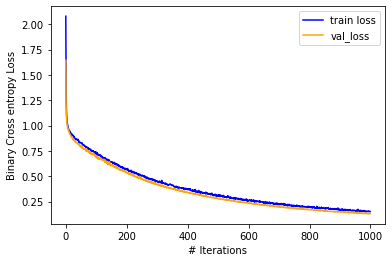

In [ ]:
plt.xlabel('# Iterations')
plt.ylabel('Binary Cross entropy Loss')
plt.plot(history.history['loss'], color='blue',label = "train loss")
plt.plot(history.history['val_loss'], color='orange',label = "val_loss")
plt.savefig(folder + "loss.jpeg")
plt.legend()
# plt.grid()
plt.show()

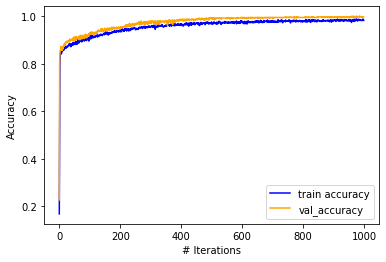

In [ ]:
plt.xlabel('# Iterations')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color='blue',label = "train accuracy")
plt.plot(history.history['val_accuracy'], color='orange',label = "val_accuracy")
# plt.grid()
plt.legend()
plt.savefig(folder + "accuracy.jpeg")
plt.show()

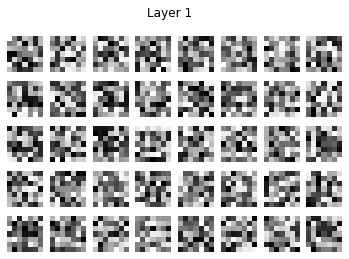

In [ ]:
fig, ax = plt.subplots(5,8)

for i in range(40):
    ax[i%5, i//5].imshow(model.layers[0].weights[0][:,:,0,i].numpy(), cmap='gray')
    ax[i%5, i//5].set_axis_off()
fig.suptitle('Layer 1')
plt.show()

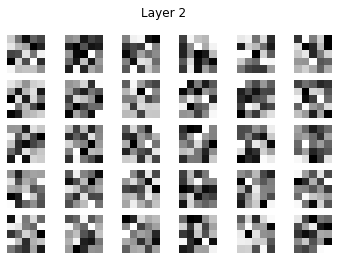

In [ ]:
fig, ax = plt.subplots(5,6, squeeze=False)
for i in range(30):
    ax[i%5, i//5].imshow(model.layers[3].weights[0][:,:,0,i].numpy(),cmap =  'gray')
    ax[i%5, i//5].set_axis_off()
fig.suptitle('Layer 2')
plt.show()

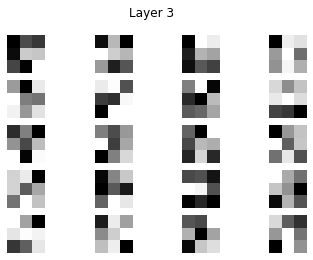

In [ ]:
fig, ax = plt.subplots(5, 4)
for i in range(20):
    ax[i%5, i//5].imshow(model.layers[6].weights[0][:,:,0,i].numpy(), 'gray')
    ax[i%5, i//5].set_axis_off()
fig.suptitle('Layer 3')
plt.show()

13/13 [==============================] - 0s 7ms/step


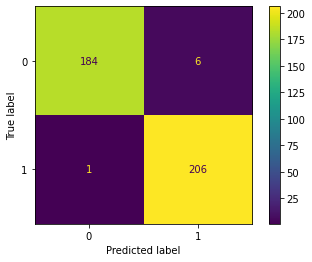

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(tf.argmax(Y_test,axis = 1), tf.argmax(model.predict(X_test),axis = 1))).plot()
plt.savefig( folder + "confusionmatrix.jpeg")
plt.show()

13/13 [==============================] - 0s 7ms/step


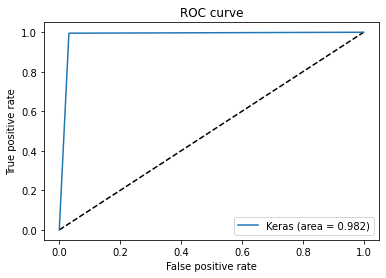

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_pred_keras = tf.argmax(model.predict(X_test),axis = 1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(tf.argmax(Y_test,axis = 1), y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(folder + "roc.jpeg")
plt.show()

In [ ]:
model

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results